In [1]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv")

In [2]:
fish_input = fish[["Weight","Length",'Diagonal','Height',"Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# noinspection PyArgumentList
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_input,test_target))

0.7815126050420168
0.1


In [9]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [10]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled,test_target))

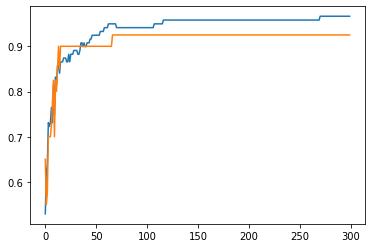

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [13]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [14]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_input,test_target))

0.957983193277311
0.1
